# Lab Notebook 4 - Decision Trees

In this exercise, we will write parts of a Decision Tree (DT) code ourselves from scratch, and then compare our results with a pre-written DT routine.

# Part 1: Organize Data

Implement or copy over the same first steps that you used in lab notebook 3:

Import numpy, matplotlib, matplotlib.pyplot, pandas, DecisionTreeClassifier from sklearn.tree, and metrics from sklearn. Set the rc parameters that you'd like to use for all your figures.

Load the data in the file "HPLearningSet.csv" using pandas and save in the dataframe "LearningSet". Since the first column is just an index, drop it using LearningSet.drop. You will need to specify the column to be dropped and the axis.

In [10]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics , tree
import matplotlib.pyplot as plt

# Part 2: Use pre-built DT code

## Step 2.1

Use the first 13 data entries as the training set, and the following 5 entries as the test set. To do so, use "iloc".

Next, split each of these sets into features (S_MASS, P_PERIOD, P_DISTANCE) and labels (P_HABITABLE). Name these new arrays Xtrain, Xtest, ytrain, and ytest, again as in Lab 3

In [11]:
HP_df = pd.read_csv(".\HPLearningSet.csv",index_col=False)
train = HP_df.iloc[:13,:][["S_MASS","P_PERIOD","P_DISTANCE","P_HABITABLE"]]
test = HP_df.iloc[13:,:][["S_MASS","P_PERIOD","P_DISTANCE","P_HABITABLE"]]

Xtrain = train[["S_MASS","P_PERIOD","P_DISTANCE"]]
Ytrain = train[["P_HABITABLE"]]

Xtest = test[["S_MASS","P_PERIOD","P_DISTANCE"]]
Ytest = test[["P_HABITABLE"]]

## Step 2.2

Time to fit the decision tree! First specify the method as DecisionTreeClassifier, using random_state = 3 (for deterministic behaviour). Next, fit the model using the training set, predict the class label on the test set, and report the accuracies for train and test sets.

In [12]:
decisionTree = DecisionTreeClassifier(random_state=3)

decisionTree.fit(Xtrain,Ytrain)

y_hat_test = decisionTree.predict(Xtest)
accuracy = metrics.accuracy_score(y_hat_test,Ytest)
accuracy

0.6

Now we can visualize the decision tree. sklearn provides a very nice utility "plot_tree" that you can import from sklearn.tree.
Use this to plot the decision tree - you should get a (slightly less pretty and without colours) version of figure 2.4 in the textbook. Set feature_labels and class_names in plot_tree so that they match figure 2.4. Make sure your figure is big enough, set for instance **plt.figure(figsize=(40,20))**

[Text(0.6, 0.8333333333333334, 'S_MASS <= 0.83\ngini = 0.497\nsamples = 13\nvalue = [7, 6]\nclass = uninhabitable'),
 Text(0.4, 0.5, 'P_PERIOD <= 4.891\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = habitable'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = uninhabitable'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = habitable'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = uninhabitable')]

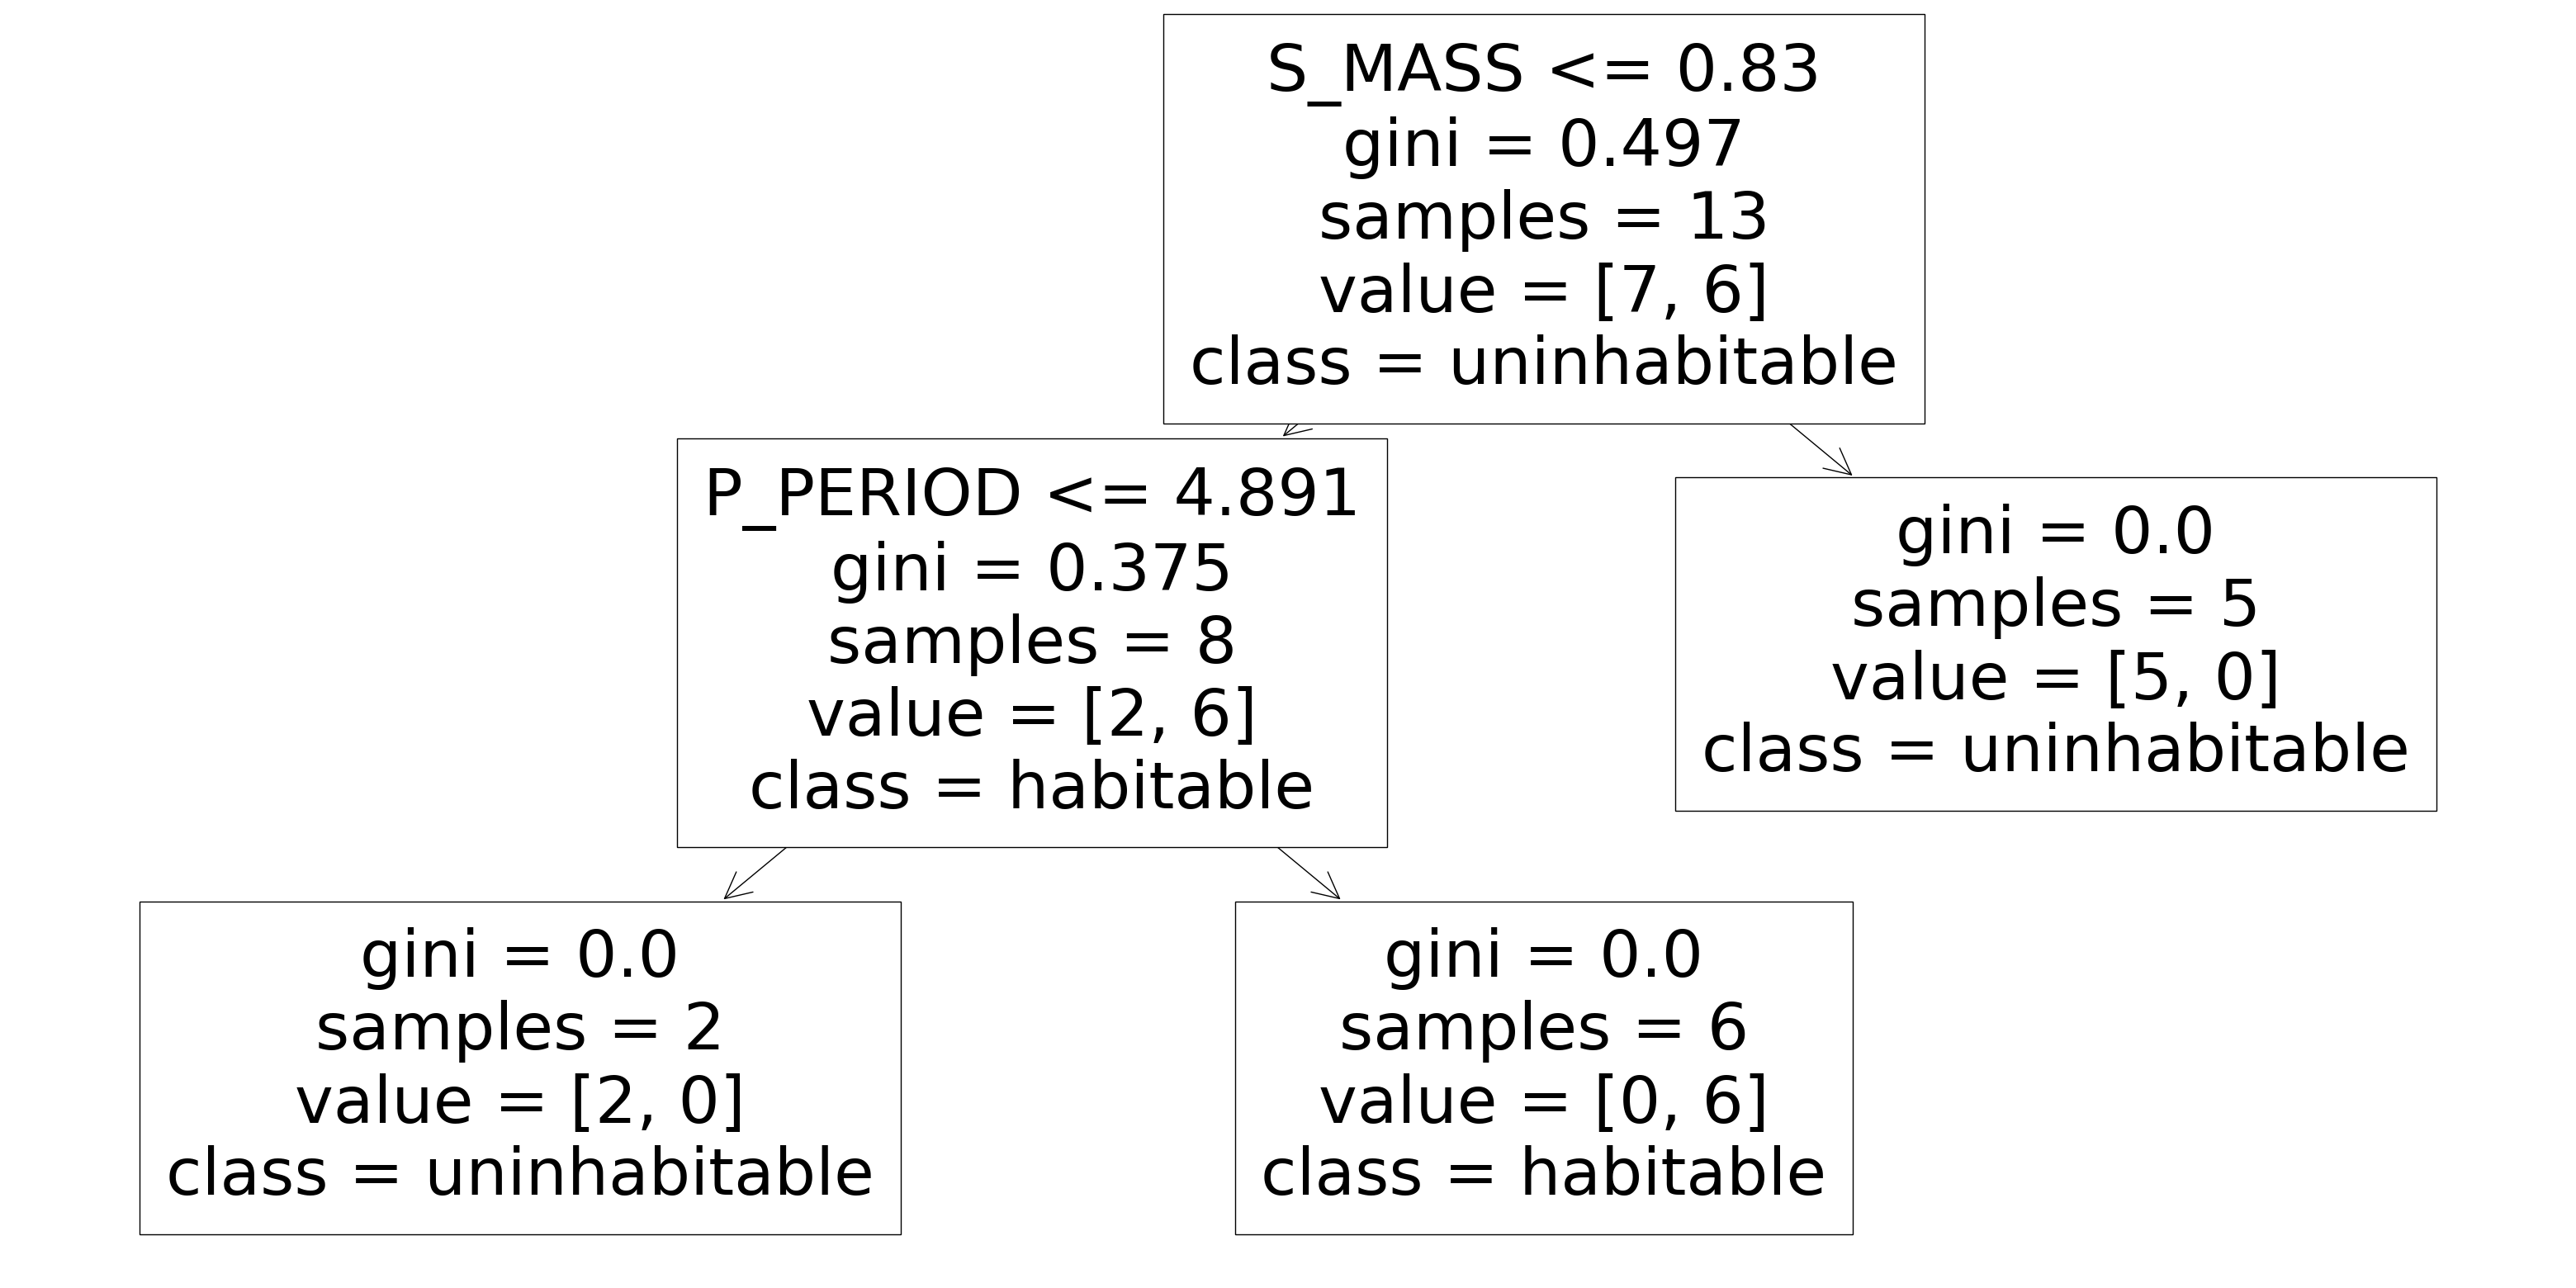

In [13]:
plt.figure(figsize=(40,20))
tree.plot_tree(decisionTree,feature_names=["S_MASS","P_PERIOD","P_DISTANCE"],class_names=["uninhabitable","habitable"])

Our text makes the point that the result can be quite sensitive to the precise way we split into test and training sets, at least for small datasets. Try their suggestion by making the last 13 datapoints the training and the first 5 datapoints the test set, then repeat the above steps. You should generate their fig. 2.6

# Part 3: write your own DT code

## Step 3.1

Now, we're going to write our own DT code, to obtain a greater understanding of how this algorithm works. There are many ways to do this. Here, you will be guided through a particular solution, but if you want to try another way, you are more than welcome! This is our most difficult course challenge so far.

1) First, define a class called "Node". 

2) Within the "Node" class, define the function "\_\_init__". (\_\_init__ is known as the constructor, and must be called when a new instance of a class is created. It allows you to initialize the variables of an object.) 

3) Let "\_\_init__" take 7 inputs: self, feature_index, threshold, left, right, info_gain, and value. Let the default values of each of these inputs (except "self") be "None". The "self" keyword is used to represent an instance (object) of the given class.

Within "\_\_init__", we're going to describe two types of nodes: decision nodes and leaf nodes. Decision nodes contain a condition to split the data. Leaf nodes are decisive; they help decide the class of a new data point.

4) The decision nodes are described by feature_index and threshold (these set the condition for a decision node, ex: star's mass must be greater than _xx_), left and right (shows how to move from a "parent" node to a "child" node), and info_gain (info gained from the split). Initialize these by typing, for instance, self.feature_index = feature_index.

5) The leaf node is only described by the value (the majority class of the leaf node). Initialize this as in step 4.

In [14]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        """
        :param feature_index:
        :param threshold:
        :param left:
        :param right:
        :param info_gain:
        :param value:
        """
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # Initialize attribute for leaf nodes:
        self.value = value
#complete constructor yourself please        

## Step 3.2

1) We define below a class called "own_DecisionTreeClassifier". Within it, we define the functions \_\_init__, build_tree, get_best_split, split, information_gain, gini_index, calculate_leaf value, fit, predict, and make_prediction. 

Based on these function names and your current understanding of Decision Trees, does this give you a roadmap of how we will proceed?

2) For the function **\_\_init__**, let it have inputs self, min_samples_split, and max_depth. min_samples_split and max_depth are starting and stopping conditions of the tree. Let their default values each be 2 (but you can play around with these values). Initialize each of the inputs using "self" as before.

3) **build_tree** is the most important function. It is recursive and will be iterated through many times as the Decision Tree is being built. For this function we provide code below. Please study it carefully since all helper functions you are going to build need to interface with **build_tree**.

4) **get_best_split** is the first key helper function, and we also give code below. As the name suggests, it is called by **build_tree** many times to determine the decision nodes. The inputs are self and dataset, then num_samples and num_features. The function loops over all features and thresholds, peforms a split for each possibility and compute its information gain. It then need to return the split with the largest gain. Look in **build_tree** for the dictionary fields that best_split should have and return this list.

Your task for this lab is to fill in code for the remaining four helper functions:

5) **split** gets called by **get_best_split** and should return dataset_left, dataset_right based on a given dataset, feature_value and threshold. Together with self, these three are input argument to the function.

6) **gini_index** should return said quantity for an input dataset.

7) **information_gain** should accept as input three datasets parent, l_child, r_child, and return gini_index(parent) - weighted sum gini_index(child). It will also be called from **get_best_split**.

8) **calculate_leaf_value** should return the majority class in that given node

The remaining three methods **print_tree**, **predict**, and **fit** can be called when applying the classifier to a dataset. Code is given below - make sure you understand what it is doing. **make_prediction** traverses the decision tree recursively.

In [18]:
from collections import Counter


class own_DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
    
    # MOST IMPORTANT:
    def build_tree(self, dataset : np.ndarray, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        # Define features and targets (X and Y):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive (zero means node is already pure
            # and does not need to be split further)
            if best_split["info_gain"]>0:
                # recur left(build all left trees then do all right trees)
                # need to increase the current depth variable
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node (only need one input)
        return Node(value=leaf_value)
    
    # Second most important function:
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf") # start with a very small number ex -infty
        
        # loop over all the features:
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            # loop over all the feature values PRESENT in the data:
            for threshold in possible_thresholds:
                # get current split for a given feature and threshold:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    
                    # update the best split if needed:
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    # Split data between child nodes based on threshold condition:
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        condition_mask = dataset[:,feature_index] <= threshold
        left_split = dataset[condition_mask]
        right_split = dataset[~condition_mask]

        return left_split,right_split
    
    def information_gain(self, parent, l_child, r_child):
        """ Function to compute information gain using Gini impurity. """
        # Calculate the Gini impurity before the split
        gini_before = self.gini_index(parent)

        # Calculate the weighted Gini impurity after the split
        p_left = len(l_child) / len(parent)
        p_right = len(r_child) / len(parent)
        gini_after = p_left * self.gini_index(l_child) + p_right * self.gini_index(r_child)

        # Reduction in Gini impurity is analogous to information gain
        gain = gini_before - gini_after
        return gain

    
    # gini = 1 - sum(p_i^2) where p_i is probability of class i
    def gini_index(self, y):
        ''' function to compute gini index '''
        class_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()

        # Compute the Gini index
        gini = 1 - np.sum(np.square(probabilities))
        return gini
       
   
    # the majority class present in that particular node
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        counts = Counter(Y)
        return counts.most_common(1)[0][0]

       
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    # For new data set:
    def predict(self, X):
        ''' function to predict new dataset '''
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Test the new routines

Before you try the whole DT routine, it is important to check each of the new components individually. You could use the train/test set from above as dataset, or just make your own one with say 2 features and a few instances. Convince yourself that each of the four methods you constructed works as you expect before proceeding.

In [35]:
tc = own_DecisionTreeClassifier()
tc.fit(Xtrain,Ytrain)
y_hat = np.array(tc.predict(np.asarray(Xtest)))
y_hat = y_hat[:,np.newaxis]
# Compute accuracy
correct_predictions = np.sum(y_hat == Ytest)
accuracy = correct_predictions / len(Ytest)
print(accuracy)
## The accuracy obtained is the same as with the Sklearn implementation of the decision tree. This is not a robust test but does suggest that the implementation of the decision tree helper functions are reasonable accurate.

P_HABITABLE    0.6
dtype: float64


C:\Users\kesha\miniconda3\envs\cs425\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## Step 3.3

Repeat steps 2.1 and 2.2 with your own classifier "own_DecisionTreeClassifier" with the arguments min_samples_split=3 and max_depth=3 (you can change these parameters and see how the results change). 

Fit to the same training data as in step 2.1. Do you get the same predictions and accuracy scores?




In [31]:
own_decisionTree = own_DecisionTreeClassifier(min_samples_split=3,max_depth=3)

own_decisionTree.fit(Xtrain,Ytrain)
y_hat = np.array(own_decisionTree.predict(np.asarray(Xtest)))
y_hat = y_hat[:,np.newaxis]
# Compute accuracy
correct_predictions = np.sum(y_hat == Ytest)
accuracy = correct_predictions / len(Ytest)
print(accuracy)

P_HABITABLE    0.6
dtype: float64


C:\Users\kesha\miniconda3\envs\cs425\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
